<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#DATA-CLEANING" data-toc-modified-id="DATA-CLEANING-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>DATA CLEANING</a></span><ul class="toc-item"><li><span><a href="#IMPORT-DATA" data-toc-modified-id="IMPORT-DATA-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>IMPORT DATA</a></span></li><li><span><a href="#DATATYPE" data-toc-modified-id="DATATYPE-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>DATATYPE</a></span></li><li><span><a href="#MISSING" data-toc-modified-id="MISSING-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>MISSING</a></span></li><li><span><a href="#general-CODING-REMARK" data-toc-modified-id="general-CODING-REMARK-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>general CODING REMARK</a></span></li><li><span><a href="#general-REMARK-on-WEIGHTS" data-toc-modified-id="general-REMARK-on-WEIGHTS-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>general REMARK on WEIGHTS</a></span></li><li><span><a href="#TARGET" data-toc-modified-id="TARGET-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>TARGET</a></span><ul class="toc-item"><li><span><a href="#construct-target:-voted" data-toc-modified-id="construct-target:-voted-1.6.1"><span class="toc-item-num">1.6.1&nbsp;&nbsp;</span>construct target: voted</a></span></li></ul></li><li><span><a href="#FEATURES---ONE-by-ONE" data-toc-modified-id="FEATURES---ONE-by-ONE-1.7"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>FEATURES - ONE by ONE</a></span></li><li><span><a href="#Change-Datatype" data-toc-modified-id="Change-Datatype-1.8"><span class="toc-item-num">1.8&nbsp;&nbsp;</span>Change Datatype</a></span></li><li><span><a href="#only-if-POST-election-survey" data-toc-modified-id="only-if-POST-election-survey-1.9"><span class="toc-item-num">1.9&nbsp;&nbsp;</span>only if POST election survey</a></span><ul class="toc-item"><li><span><a href="#MISSING" data-toc-modified-id="MISSING-1.9.1"><span class="toc-item-num">1.9.1&nbsp;&nbsp;</span>MISSING</a></span></li></ul></li><li><span><a href="#Save" data-toc-modified-id="Save-1.10"><span class="toc-item-num">1.10&nbsp;&nbsp;</span>Save</a></span></li></ul></li></ul></div>

# DATA CLEANING

In [1]:
import pandas as pd
import numpy as np
import missingno as msno

pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)
pd.options.display.max_colwidth=300

## IMPORT DATA

In [2]:
# only numerical (except for text)
cces = pd.io.stata.StataReader('data/CCES16.dta')
df = cces.read(convert_categoricals=False)

In [3]:
# with codes in categories
cces = pd.io.stata.StataReader('data/CCES16.dta')
dfn = cces.read(convert_categoricals=True)

In [4]:
# raw data? --> NO
#dfr = pd.read_csv('data/CCES16.tab', sep='\t')

# original unchanged data
cces = pd.io.stata.StataReader('data/CCES16.dta')
dfo = cces.read(convert_categoricals=True)

In [5]:
labels = cces.variable_labels()
pd.DataFrame.from_dict(labels, orient="index").to_csv("labels.csv")
#labels = pd.read_csv("labels.csv", index_col=0).to_dict('dict')['0']
labels

{'V101': 'Case ID',
 'commonweight_vv': 'Common content with voter validation weights',
 'commonweight_vv_post': 'Common content with voter validation weights post-election',
 'commonweight_vv_lgbt': 'Weights for LGBT variable analysis',
 'commonweight': 'Common content weights',
 'commonweight_post': 'Common content weights post-election',
 'tookpost': 'Took post-election wave',
 'lookupzip': 'Zip code for mapping CD',
 'inputstate': 'State',
 'cdid113': 'CD 113th/114th Congress',
 'cdid115': 'CD 115th Congress',
 'countyfips': 'County FIPS code',
 'countyname': 'County Name',
 'CurrentGovName': 'Current Governor Name',
 'CurrentGovParty': 'Current Governor Party',
 'CurrentHouseGender': 'Current House Gender',
 'CurrentHouseName': 'Current House Name',
 'CurrentHouseParty': 'Current House Party',
 'CurrentSen1Gender': 'Current Senate 1 Gender',
 'CurrentSen1Name': 'Current Senate 1 Name',
 'CurrentSen1Party': 'Current Senate 1 Party',
 'CurrentSen2Gender': 'Current Senate 2 Gender',


## DATATYPE

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64600 entries, 0 to 64599
Columns: 563 entries, V101 to dmaname
dtypes: datetime64[ns](4), float64(316), int16(1), int32(1), int8(50), object(191)
memory usage: 255.8+ MB


In [7]:
df.select_dtypes('datetime64[ns]').columns

Index(['starttime_pre', 'endtime_pre', 'starttime_post', 'endtime_post'], dtype='object')

In [8]:
df.select_dtypes('object').columns

Index(['lookupzip', 'cdid113', 'cdid115', 'countyfips', 'countyname',
       'CurrentGovName', 'CurrentGovParty', 'CurrentHouseGender',
       'CurrentHouseName', 'CurrentHouseParty',
       ...
       'CL_matched', 'CL_voterstatus', 'CL_partyaffiliation', 'CL_state',
       'CL_E2016GVM', 'CL_E2016PPEP', 'CL_E2016PPVM', 'CL_E2016PEP',
       'CL_E2016PVM', 'dmaname'],
      dtype='object', length=191)

## MISSING

In [9]:
df.isnull().sum().sort_values(ascending=False).head(10)

regzip_post          64483
CC16_366x            64419
religpew_advent      64350
religpew_reformed    64333
religpew_holiness    64295
religpew_hindu       64280
religpew_orthodox    64175
religpew_muslim      64129
inputzip_post        63894
religpew_congreg     63893
dtype: int64

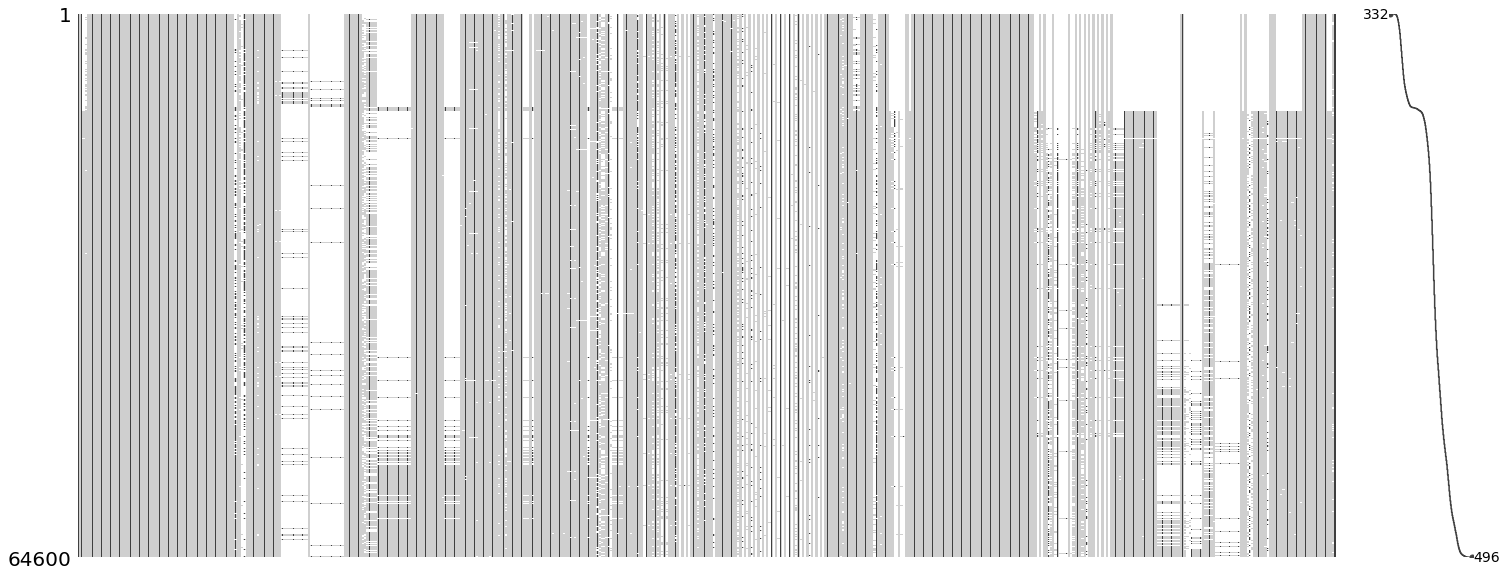

In [10]:
msno.matrix(df, sort='ascending')

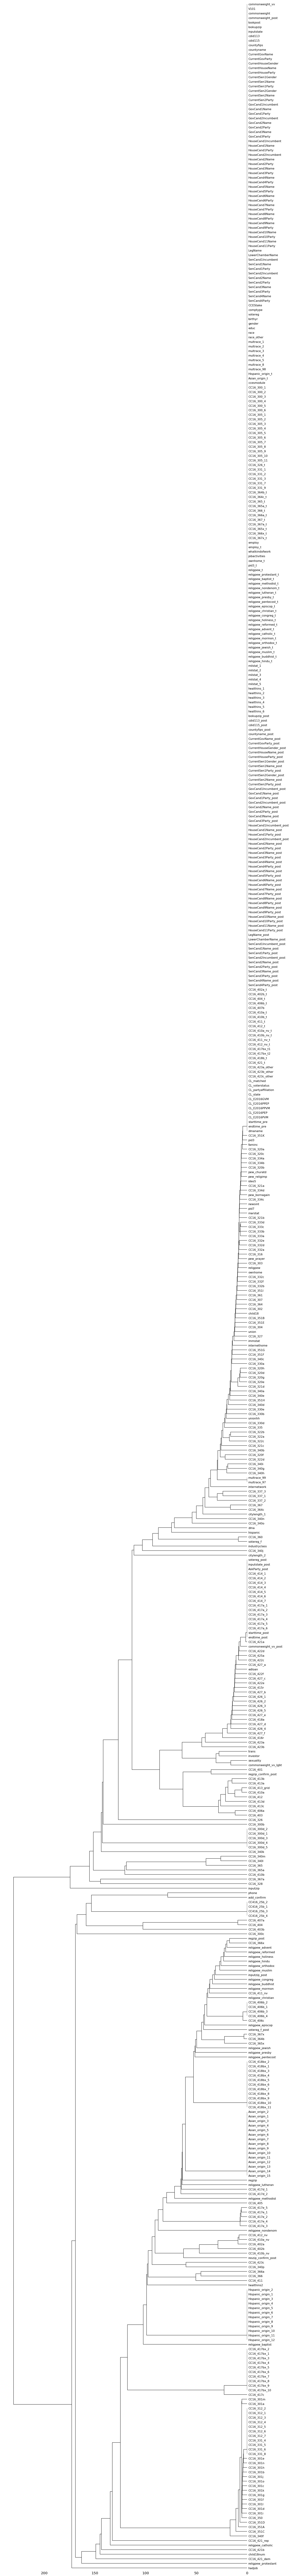

In [11]:
msno.dendrogram(df)

---

## general CODING REMARK

97 - don't know - missing <br>
98 - skipped (not aswered) - missing <br>
99 - not asked (not applicable, find filter question) - not missing

## general REMARK on WEIGHTS

it's a stratifies sample, to get a representative picture of the US (national and state level are possible) the data needs to be weighted

- _vv: after vote validation
- _post: weights for the variables of the post election survey


In [12]:
print(df.commonweight_vv_post.sum())
print(df[df.commonweight_vv_post.notna()].shape) # 52942

52942.00000000001
(52942, 563)


weights need to be adjusted if observations are deleted! - not relevant if percentages are used

In [13]:
print(dfn.inputstate.nunique())
dfn.inputstate_post.value_counts(dropna=False)
#df.CL_state.value_counts(dropna=False)

51


NaN                     11701
California               4821
Florida                  4044
Texas                    3487
New York                 3349
Pennsylvania             2984
Ohio                     2266
Illinois                 2157
Michigan                 1776
North Carolina           1638
Virginia                 1621
Georgia                  1543
New Jersey               1473
Arizona                  1274
Washington               1194
Massachusetts            1192
Indiana                  1186
Wisconsin                1171
Missouri                 1103
Maryland                 1001
Tennessee                 988
Minnesota                 937
Colorado                  894
Oregon                    883
Kentucky                  771
South Carolina            699
Alabama                   616
Iowa                      615
Connecticut               595
Nevada                    584
Louisiana                 544
Oklahoma                  511
Arkansas                  441
Kansas    

In [14]:
print(dfn.inputstate.nunique())
df[df.inputstate_post==6].commonweight_vv_post.sum()
#df[df.CL_state=='CA'].commonweight_vv.sum()

51


4786.655710632066

---

## TARGET

possible targets:
- votereg (registered to vote, 10% are not registered)
- votereg_post (post election survey)
- CC16_401 (voted in election, post)
- CC16_410a (candidate they voted for, 1 Trump, 2 Clinton)

early vote: CC16_364b <br>
vote validation: future work

In [15]:
# check if early votes are included in post election survey: YES

print(dfn.CC16_364b.value_counts(dropna=False))
print(' ')
print(pd.crosstab(dfn.CC16_364b, dfn.tookpost, dropna=False))

NaN                               63085
Hillary Clinton (Democrat)          831
Donald Trump (Republican)           478
Gary Johnson (Libertarian)           85
Other                                45
Jill Stein (Green)                   40
I'm not sure                         25
I didn't vote in this election       11
Name: CC16_364b, dtype: int64
 
tookpost                         No  Yes
CC16_364b                               
Donald Trump (Republican)        71  407
Hillary Clinton (Democrat)      128  703
Gary Johnson (Libertarian)       29   56
Jill Stein (Green)               11   29
Other                             8   37
I didn't vote in this election    8    3
I'm not sure                      9   16


In [16]:
pd.crosstab(dfn.CC16_364b, dfn.CC16_410a, dropna=False)
# inconsistent!

# ignore early vote... maybe dummy if voted early

CC16_410a,Donald Trump (Republican),Hillary Clinton (Democrat),Gary Johnson (Libertarian),Jill Stein (Green),Other,I didn't vote in this election,I'm not sure,Evan McMullin (Independent)
CC16_364b,,,,,,,,
Donald Trump (Republican),395,0,0,0,1,0,1,0
Hillary Clinton (Democrat),3,675,2,1,1,0,1,0
Gary Johnson (Libertarian),2,4,41,2,0,0,0,0
Jill Stein (Green),1,2,0,24,0,0,0,0
Other,2,8,1,0,19,1,1,2
I didn't vote in this election,0,0,0,0,0,1,0,0
I'm not sure,7,2,1,1,1,0,2,0


In [17]:
print(dfn.CC16_410a.value_counts(dropna=False))
print(' ')
print(pd.crosstab(dfn.CC16_410a, df.CC16_401, dropna=False))
print(' ')
print(dfn.CC16_401.value_counts(dropna=False))

Hillary Clinton (Democrat)        22136
NaN                               19358
Donald Trump (Republican)         18755
Gary Johnson (Libertarian)         1829
Other                              1136
Jill Stein (Green)                  913
I'm not sure                        229
Evan McMullin (Independent)         163
I didn't vote in this election       81
Name: CC16_410a, dtype: int64
 
CC16_401                        1.0  2.0  3.0  4.0    5.0
CC16_410a                                                
Donald Trump (Republican)         0    0    0    0  18755
Hillary Clinton (Democrat)        0    0    0    0  22136
Gary Johnson (Libertarian)        0    0    0    0   1829
Jill Stein (Green)                0    0    0    0    913
Other                             0    0    0    0   1136
I didn't vote in this election    0    0    0    0     81
I'm not sure                      0    0    0    0    229
Evan McMullin (Independent)       0    0    0    0    163
 
I definitely voted in the 

In [18]:
print(df.loc[df.CC16_401==5].CC16_410a.value_counts(dropna=False))

2.0    22136
1.0    18755
3.0     1829
5.0     1136
4.0      913
7.0      229
8.0      163
6.0       81
NaN       50
Name: CC16_410a, dtype: int64


In [19]:
# CC16_401: 3725 were not asked --> find filter
print(dfn.tookpost.value_counts())
dfn[df.tookpost==1].CC16_401.value_counts(dropna=False)
print(dfn[(df.tookpost==1) & (df.CC16_401.isnull())].votereg_post.value_counts(dropna=False))

# filter: votereg_post: if not registered to vote question is not asked,
# but other questions (why not voted) were asked, therefore --> code as not voted!

Yes    52899
No     11701
Name: tookpost, dtype: int64
No            3725
Yes             84
Don't know       5
Name: votereg_post, dtype: int64


### construct target: voted
  1 - Trump <br>
  2 - Clinton <br>
  3 - other <br>
  0 - did not vote

In [20]:
df = df.assign(voted=df.CC16_410a)

df.voted.replace([4, 5, 8], 3, inplace=True)
df.voted.replace(7, np.nan, inplace=True)
df.voted.replace(6, 0, inplace=True)
df.voted.mask((df.CC16_401<5), 0, inplace=True)
df.voted.mask((df.votereg_post==2) & (df.voted.isnull()), 0, inplace=True)

df.voted.value_counts(dropna=False)

2.0    22136
1.0    18755
NaN    12069
0.0     7599
3.0     4041
Name: voted, dtype: int64

In [21]:
dfn = dfn.assign(voted=df.voted)
dfn.voted.replace([0, 1, 2, 3], ['no vote', 'Trump', 'Clinton', 'other'], inplace=True)
dfn['voted'] = dfn.voted.astype('category')
print(dfn.voted.dtype)
dfn.voted.value_counts(dropna=False)

category


Clinton    22136
Trump      18755
NaN        12069
no vote     7599
other       4041
Name: voted, dtype: int64

## FEATURES - ONE by ONE

In [22]:
labels = cces.variable_labels()
labels

{'V101': 'Case ID',
 'commonweight_vv': 'Common content with voter validation weights',
 'commonweight_vv_post': 'Common content with voter validation weights post-election',
 'commonweight_vv_lgbt': 'Weights for LGBT variable analysis',
 'commonweight': 'Common content weights',
 'commonweight_post': 'Common content weights post-election',
 'tookpost': 'Took post-election wave',
 'lookupzip': 'Zip code for mapping CD',
 'inputstate': 'State',
 'cdid113': 'CD 113th/114th Congress',
 'cdid115': 'CD 115th Congress',
 'countyfips': 'County FIPS code',
 'countyname': 'County Name',
 'CurrentGovName': 'Current Governor Name',
 'CurrentGovParty': 'Current Governor Party',
 'CurrentHouseGender': 'Current House Gender',
 'CurrentHouseName': 'Current House Name',
 'CurrentHouseParty': 'Current House Party',
 'CurrentSen1Gender': 'Current Senate 1 Gender',
 'CurrentSen1Name': 'Current Senate 1 Name',
 'CurrentSen1Party': 'Current Senate 1 Party',
 'CurrentSen2Gender': 'Current Senate 2 Gender',


In [23]:
# define lists to cluster variables
# v_survey + v_other + v_loc + v_dem + v_media + v_perception + v_four + v_opinion + v_polpos + v_polac + v_campaign
# v_party + v_vote + v_vote2

v_survey = ['commonweight_vv', 'commonweight_vv_post', 'tookpost']

v_other = ['comptype']

v_loc = ['lookupzip', 'inputstate', 'countyfips', 'countyname', 'inputzip',
         'lookupzip_post', 'inputstate_post', 'countyfips_post', 'countyname_post', 'inputzip_post']

v_dem = ['birthyr', 'gender', 'educ', 'race', 'immstat', 'CC16_361', 'citylength_1',
         'employ', 'hadjob', 'industryclass', 'ownhome', 'faminc', 'investor', 'edloan',
         'child18', 'child18num', 'marstat', 'lgbt',
         'pew_bornagain', 'pew_religimp', 'pew_churatd', 'pew_prayer', 'religpew',
         'milstat_1', 'milstat_2', 'milstat_3', 'milstat_4', 'milstat_5',
         'union', 'unionhh', 'newsint', 'internethome',
         'healthins_1', 'healthins_2', 'healthins_3', 'healthins_4', 'healthins_5', 'healthins_6']

v_media = ['CC16_300_1', 'CC16_300_2', 'CC16_300_3', 'CC16_300_4', 'CC16_300_5', 'CC16_300_6']
#           'CC16_300b', 'CC16_300c', 'CC16_300d_1', 'CC16_300d_2', 'CC16_300d_3', 'CC16_300d_4',
#           'CC16_300d_5']

v_perception = ['CC16_302', 'CC16_304',
                'CC16_427_a', 'CC16_427_b', 'CC16_427_c', 'CC16_427_d', 'CC16_427_e', 'CC16_427_f']

v_four = ['CC16_303', 'CC16_305_1', 'CC16_305_2', 'CC16_305_3', 'CC16_305_4', 'CC16_305_5',
          'CC16_305_6', 'CC16_305_7', 'CC16_305_8', 'CC16_305_9', 'CC16_305_10', 'CC16_305_11']

v_opinion = ['CC16_307', 'CC16_330a', 'CC16_330b', 'CC16_330d', 'CC16_330e',
             'CC16_331_1', 'CC16_331_2', 'CC16_331_3', 'CC16_331_7', 'CC16_331_9',
             'CC16_332a', 'CC16_332b', 'CC16_332c', 'CC16_332d', 'CC16_332e', 'CC16_332f',
             'CC16_333a', 'CC16_333b', 'CC16_333c', 'CC16_333d',
             'CC16_334a', 'CC16_334b', 'CC16_334c', 'CC16_334d', 'CC16_335',
             'CC16_337_1', 'CC16_337_2', 'CC16_337_3',
             'CC16_351B', 'CC16_351E', 'CC16_351F', 'CC16_351G', 'CC16_351H', 'CC16_351I', 'CC16_351K',
             'CC16_414_1', 'CC16_414_2', 'CC16_414_3', 'CC16_414_4', 'CC16_414_5', 'CC16_414_6', 'CC16_414_7',
             'CC16_415r', 'CC16_416r', 'CC16_422c', 'CC16_422d', 'CC16_422e', 'CC16_422f',
             'CC16_426_1', 'CC16_426_2', 'CC16_426_3', 'CC16_426_4', 'CC16_426_5']

v_polpos = ['CC16_320a', 'CC16_320b', 'CC16_320c', 'CC16_316', 'CC16_326'] # political position

v_polac = ['CC16_417a_1', 'CC16_417a_2', 'CC16_417a_3', 'CC16_417a_4', 'CC16_417a_5', 'CC16_417a_6',
           'CC16_418a'] # political activity

v_campaign = ['CC16_425a', 'CC416_25b_1', 'CC416_25b_2', 'CC416_25b_3', 'CC416_25b_4']

v_party = ['CC16_360', 'pid3', 'pid7', 'pid7_post']

v_vote = ['votereg_post', 'CC16_327', 'CC16_328', 'CC16_403']

v_vote2 = ['early'] # exclude early if voter vs. non-voter

for practical reasons I start at the end of the survey, with the post-election part

In [24]:
# mode of vote: EXCLUDE if voters and non-voters are classified
# question asked if voted (CC16_401==5) or attempted (==4)

print(dfn.CC16_403.value_counts(dropna=False))
print('')

# code 99 if question was not asked, ignore tookpost==0
df.CC16_403.mask((df.CC16_403.isnull()) & (df.voted==0), 99, inplace=True)
print(df.CC16_403.value_counts(dropna=False))


# construct early vote
df = df.assign(early=df.CC16_403.apply(lambda x: 1 if (x==2) else 0))
df.early.value_counts(dropna=False)

In person on election day                24462
NaN                                      18899
Voted by mail (or absentee)              11020
In person before election day (early)     9929
Don't know                                 290
Name: CC16_403, dtype: int64

1.0     24462
NaN     11843
3.0     11020
2.0      9929
99.0     7056
4.0       290
Name: CC16_403, dtype: int64


0    54671
1     9929
Name: early, dtype: int64

In [25]:
# student debt (post election?)
dfn.edloan.value_counts(dropna=False)

No     42037
NaN    11811
Yes    10752
Name: edloan, dtype: int64

In [26]:
# CC16_421a == pid3_post
# pid7 is constructed from all variables and contains all information

df = df.assign(pid3_post=df.CC16_421a)
print(dfn.CC16_421a.value_counts(dropna=False))
df.pid3_post.mask((df.CC16_421a==4) & (df.CC16_421b<4), 3, inplace=True)
print(df.pid3_post.value_counts(dropna=False))

df = df.assign(pid7_post=df.CC16_421_dem)
df.pid7_post.mask(df.pid7_post.isnull(), df.CC16_421_rep.replace([1 , 2], [7, 6]), inplace=True)
df.pid7_post.mask(df.pid7_post.isnull(), df.CC16_421b.replace([1 , 2, 3], [3, 5, 4]), inplace=True)
df.pid7_post.mask(df.pid7_post.isnull(), df.CC16_421a.replace([1 , 2, 3, 4], [2, 6, 4, np.nan]), inplace=True)

print(df.pid7_post.value_counts(dropna=False))

Democrat       20270
Independent    15787
Republican     14245
NaN            11703
Other           2595
Name: CC16_421a, dtype: int64
1.0    20270
3.0    18142
2.0    14245
NaN    11703
4.0      240
Name: pid3_post, dtype: int64
1.0    13036
NaN    11709
4.0     8158
7.0     7845
2.0     7237
6.0     6398
5.0     4728
3.0     4653
8.0      836
Name: pid7_post, dtype: int64


In [27]:
# contacted in campain with filter on how - post election (note tookpost==1)

print(df.CC16_425a.value_counts(dropna=False))
print(df.CC416_25b_1.value_counts(dropna=False)) # coding error - inconsistent variable name
pd.crosstab(dfn.CC16_425a, df.CC416_25b_1, dropna=False)
df.loc[:,'CC416_25b_1':'CC416_25b_4'].columns
for i in ['CC416_25b_1', 'CC416_25b_2', 'CC416_25b_3', 'CC416_25b_4']:
    df[i].mask((df[i].isnull()) & (df.CC16_425a==2), 99, inplace=True)
df.CC416_25b_2.value_counts(dropna=False)

1.0    28570
2.0    24266
NaN    11764
Name: CC16_425a, dtype: int64
NaN    36029
2.0    22723
1.0     5848
Name: CC416_25b_1, dtype: int64


99.0    24265
1.0     20943
NaN     11764
2.0      7628
Name: CC416_25b_2, dtype: int64

In [28]:
# 417 (attendance, donation) includes filter questions, difficult to identify them exactly
# reduced to 417a - no filter
#  - post election (note tookpost==1)
df.loc[:,'CC16_417a_1':'CC16_417e_5'].columns

Index(['CC16_417a_1', 'CC16_417a_2', 'CC16_417a_3', 'CC16_417a_4',
       'CC16_417a_5', 'CC16_417a_6', 'CC16_417bx_1', 'CC16_417bx_2',
       'CC16_417bx_3', 'CC16_417bx_4', 'CC16_417bx_5', 'CC16_417bx_6',
       'CC16_417bx_7', 'CC16_417bx_8', 'CC16_417bx_9', 'CC16_417bx_10',
       'CC16_417bx_t1', 'CC16_417bx_t2', 'CC16_417c', 'CC16_417d_1',
       'CC16_417d_2', 'CC16_417e_1', 'CC16_417e_2', 'CC16_417e_3',
       'CC16_417e_4', 'CC16_417e_5'],
      dtype='object')

In [29]:
# this is an internet survey...
print(dfn.internethome.value_counts(dropna=False))
print(dfn.internetwork.value_counts(dropna=False)) # not included

Broadband    60782
None          2653
Dial-up        968
NaN            197
Name: internethome, dtype: int64
Broadband    39317
None         23236
NaN           1247
Dial-up        800
Name: internetwork, dtype: int64


In [30]:
# why are there so many skips in phone? --> drop phone
# might be imputed by using mode of doing survey
dfn.phone.value_counts(dropna=False)

NaN          33130
Both         17413
Cell only    12503
Landline      1314
No phone       240
Name: phone, dtype: int64

In [31]:
# healthins2 only asked if purchased their own health insurance, does not seem that important
df.healthins2.value_counts(dropna=False)

NaN    56988
2.0     4636
1.0     2976
Name: healthins2, dtype: int64

In [32]:
# respondents who skipped the question are coded as heterosexual/ straight --> can't use variable like this
# --> create dummy
# for trans variable, data does not match guide

print(dfn.sexuality.value_counts(dropna=False))
df = df.assign(lgbt=df.sexuality.apply(lambda x: 1 if ((x>1) & (x<5)) else 0))
print(df.trans.value_counts(dropna=False))
df.lgbt.mask(df.trans==1, 1, inplace=True)
print(df.lgbt.value_counts(dropna=False))


dfn = dfn.assign(lgbt=df.lgbt.apply(lambda x: 'Yes' if x==1 else 'No'))
dfn.lgbt = dfn.lgbt.astype('category')
dfn.lgbt = dfn.lgbt.cat.set_categories(['Yes', 'No'], ordered=True)

dfn = dfn.assign(trans=df.trans.apply(lambda x: 'Yes' if x==1 else 'No'))
dfn.trans = dfn.trans.astype('category')
dfn.trans = dfn.trans.cat.set_categories(['Yes', 'No'], ordered=True)
dfn.trans.dtype

Heterosexual / straight    50942
NaN                         7713
Bisexual                    1853
Gay man                     1638
Prefer not to say           1208
Lesbian / gay woman          688
Other                        558
Name: sexuality, dtype: int64
2.0    54497
NaN     8320
1.0     1041
3.0      742
Name: trans, dtype: int64
0    59654
1     4946
Name: lgbt, dtype: int64


CategoricalDtype(categories=['Yes', 'No'], ordered=True)

In [33]:
# stock ownership does not match numbers in guide!
df.investor.value_counts(dropna=False)

2.0    32481
1.0    24195
NaN     7924
Name: investor, dtype: int64

In [34]:
# family income, 97 is actually missing
df.faminc.value_counts(dropna=False)
df.faminc.replace(97, np.nan, inplace=True)
df.faminc.value_counts(dropna=False)

dfn.faminc.replace('Prefer not to say', np.nan, inplace=True)
dfn.faminc.cat.remove_unused_categories(inplace=True)
dfn.faminc.value_counts(dropna=False)
dfn.faminc.dtype

CategoricalDtype(categories=['Less than $10,000', '$10,000 - $19,999',
                  '$20,000 - $29,999', '$30,000 - $39,999',
                  '$40,000 - $49,999', '$50,000 - $59,999',
                  '$60,000 - $69,999', '$70,000 - $79,999',
                  '$80,000 - $99,999', '$100,000 - $119,999',
                  '$120,000 - $149,999', '$150,000 - $199,999',
                  '$200,000 - $249,999', '$250,000 - $349,999',
                  '$350,000 - $499,999', '$500,000 or more',
                  '$150,000 or more'],
                 ordered=True)

In [35]:
# fill citylength with month and information about stay at current address
# note that stay larger than 5 years is filled with median == 19, might need bins

print(df.citylength_1.describe())
print(df[['CC16_361', 'citylength_1', 'citylength_2']].isnull().sum())
df.loc[df.citylength_1.isnull()].citylength_2.value_counts(dropna=False)
df.citylength_1.mask(df.citylength_1.isnull(), df.citylength_2.floordiv(12), inplace=True) # translate month to years
print(df[['CC16_361', 'citylength_1', 'citylength_2']].isnull().sum())
df.loc[df.citylength_1.isnull()].CC16_361.value_counts(dropna=False)
df.citylength_1.mask((df.citylength_1.isnull()) & (df.CC16_361<4), 0, inplace=True)
df.citylength_1.mask((df.citylength_1.isnull()) & (df.CC16_361==4), 2, inplace=True)
df.citylength_1.mask((df.citylength_1.isnull()) & (df.CC16_361==5), 4, inplace=True)
df.citylength_1.mask((df.citylength_1.isnull()) & (df.CC16_361==6), df[df.CC16_361==6].citylength_1.median(), inplace=True)
print(df[['CC16_361', 'citylength_1', 'citylength_2']].isnull().sum())

dfn.citylength_1 = dfn.citylength_1.astype('int32')
dfn.citylength_1 = df.citylength_1

count    62757.000000
mean        16.510620
std         15.317908
min          0.000000
25%          4.000000
50%         12.000000
75%         25.000000
max        100.000000
Name: citylength_1, dtype: float64
CC16_361           98
citylength_1     1843
citylength_2    12312
dtype: int64
CC16_361           98
citylength_1      251
citylength_2    12312
dtype: int64
CC16_361           98
citylength_1        3
citylength_2    12312
dtype: int64


In [36]:
# party orientation
df.pid3.value_counts(dropna=False)
df.pid7.value_counts(dropna=False)
pd.crosstab(dfn.pid7, dfn.pid3, dropna=False)

# not sure pid7
df.pid7.mask((df.pid7==8) & (df.pid3==1), 2, inplace=True)
df.pid7.mask((df.pid7==8) & (df.pid3==3), 4, inplace=True)
# not sure pid3
df.pid3.mask((df.pid3==5) & (df.pid7==2), 1, inplace=True)
df.pid3.mask((df.pid3==5) & ((df.pid7==3) | (df.pid7==4) | (df.pid7==5)), 3, inplace=True)
# other pid3
df.pid3.mask((df.pid3==4) & ((df.pid7==3) | (df.pid7==4) | (df.pid7==5)), 3, inplace=True)
# inconsistent
df.loc[((df.pid3==1) & (df.pid7==6)), ['pid3', 'pid7']] = np.nan
df.loc[((df.pid3==2) & (df.pid7==2)), ['pid3', 'pid7']] = np.nan
df.loc[((df.pid3==3) & (df.pid7==7)), ['pid3', 'pid7']] = np.nan

# replace nan in pid7 if information in pid3
df.loc[df.pid7.isnull()].pid3.value_counts(dropna=False)
df.pid7.mask(((df.pid7.isnull()) & (df.pid3==5)), 8, inplace=True)
df.pid7.mask(((df.pid7.isnull()) & (df.pid3==1)), 2, inplace=True)
df.pid7.mask(((df.pid7.isnull()) & (df.pid3==3)), 4, inplace=True)
df.pid7.mask(((df.pid7.isnull()) & (df.pid3==2)), 6, inplace=True)
df.pid7.mask(((df.pid7.isnull()) & (df.pid3==4)), 8, inplace=True)

pd.crosstab(df.pid7, df.pid3, dropna=False)

pid3,1.0,2.0,3.0,4.0,5.0
pid7,,,,,
1.0,16251,0,0,0,0
2.0,8629,0,0,0,0
3.0,1,0,6269,0,0
4.0,1,0,11037,0,0
5.0,0,0,5554,0,0
6.0,0,6821,0,0,0
7.0,0,8478,0,0,0
8.0,0,0,0,48,1488


In [37]:
# !!! missing ----------------------------------------------------------------------- !!!
# child18 num only if no children, here recoded with 0
df.child18.value_counts(dropna=False)
pd.crosstab(df.child18num, df.child18, dropna=False)
df.child18num.mask((df.child18num.isnull()) & (df.child18==2), 0, inplace=True)
df.child18num.value_counts(dropna=False)

dfn.child18num = dfn.child18num.astype('int32')
dfn.child18num = df.child18num

df.loc[df.child18num.isnull()].child18.value_counts(dropna=False) # --> fill missing with median

1.0    409
NaN    117
Name: child18, dtype: int64

In [38]:
# industryclass only asked if R had a job
print(dfn.industryclass.value_counts(dropna=False))

df.industryclass.where(((df.industryclass.notna()) | ((df.hadjob==1) | (df.employ<3) | (df.employ==5) | (df.employ==9))), 99, inplace=True)
df.industryclass.value_counts(dropna=False)

# I did not change the missing values to 99 in the labeled dataset, not important for EDA

Other Services (except Public Administration)       8741
NaN                                                 8571
 Health Care and Social Assistance                  5530
 Education Services                                 5325
Retail Trade                                        5090
Professional, Scientific, and Technical Services    4428
Manufacturing                                       4159
Administrative and Support                          3425
Finance  and Insurance                              2774
Construction                                        2410
Hotel Accommodation  and  Food Services             2342
Transportation  and Warehousing                     2303
Public Administration                               1916
Information                                         1745
Arts, Entertainment, and Recreation                 1644
Real Estate and Rental and Leasing                   922
Utilities                                            748
Management of Companies and Ent

22.0    8741
99.0    7462
19.0    5530
18.0    5325
9.0     5090
14.0    4428
7.0     4159
16.0    3425
12.0    2774
6.0     2410
21.0    2342
10.0    2303
23.0    1916
11.0    1745
20.0    1644
NaN     1109
13.0     922
5.0      748
15.0     739
8.0      712
1.0      572
17.0     143
4.0      135
2.0      118
3.0      108
Name: industryclass, dtype: int64

In [39]:
# hadjob in past 5 years
# asked only if employ is 3, 4, 5, 6, 7, 8 (not asked if employed right now)
# if employed coded as had job in last 5 years

df.hadjob.mask(((df.hadjob.isnull()) & (df.employ<3)), 1, inplace=True)
pd.crosstab(df.employ, df.hadjob)

dfn.hadjob.mask(((dfn.hadjob.isnull()) & ((dfn.employ=='Full-time') | (dfn.employ=='Part-time'))), 'Yes', inplace=True)
dfn.hadjob.value_counts(dropna=False)

Yes    48360
No     16189
NaN       51
Name: hadjob, dtype: int64

In [40]:
# Party registration, asked if R is registered (votereg=1)

pd.crosstab(df.CC16_360, df.votereg, dropna=False)
df.CC16_360.mask(((df.CC16_360.isnull()) & (df.votereg!=1)), 99, inplace=True)
pd.crosstab(df.CC16_360, df.votereg, dropna=False)
print(dfn.CC16_360.value_counts(dropna=False))
df.CC16_360.value_counts(dropna=False)

Democratic Party                           24084
No Party, Independent, Decline to state    15980
Republican Party                           15908
NaN                                         7607
Other                                       1021
Name: CC16_360, dtype: int64


2.0     24084
1.0     15980
3.0     15908
99.0     7534
4.0      1021
NaN        73
Name: CC16_360, dtype: int64

In [41]:
# Budget Priorities - Cut Defense Spending - Cut Domestic Spending - Raise Taxes
dfn.CC16_337_1.value_counts(dropna=False)

Ranked first     25054
Ranked second    24355
Ranked third     13760
NaN               1431
Name: CC16_337_1, dtype: int64

In [42]:
# opinion variables: support - oppose statement
# 330 gun control
# 331 immigration, note: check all that apply, some only for subsample (dropped)
# 332 abortion
# 333 environment
# 334 crime
# 335 gay marriage

In [43]:
# !!! missing ----------------------------------------------------------------------- !!!
# Vote in primary: rule if they know who they voted for (328), 327 is changed to yes
# if they did not vote 328 can be changed to 99 --> not yet

pd.crosstab(df.CC16_328, df.CC16_327)
df.CC16_327.mask(((df.CC16_327==2) & (df.CC16_328<10)), 1, inplace=True)
#df.CC16_328.mask((df.CC16_327==2), 99, inplace=True)
pd.crosstab(dfn.CC16_328, dfn.CC16_327)

CC16_327,"Yes, voted in a primary or caucus","No, didn't vote in a primary or caucus"
CC16_328,,
Hillary Clinton,12659,2
Bernie Sanders,9012,0
Another Democrat,240,0
Donald Trump,8025,1
Ted Cruz,3758,1
John Kasich,1739,0
Marco Rubio,1538,1
Another Republican,961,0
Someone else who is not a Democrat or Republican,603,1


In [44]:
#1 Vote 2012: rule if someone knows who they votes for (326), they are coded as voted (316)
#2 if they reply later (326) that they didn't vote, code in 316 is changed
#3 missings in 326 are replaced if someone did not vote, still missings present because of skips

pd.crosstab(dfn.CC16_316, dfn.CC16_326, dropna=False) # clean!!!
pd.crosstab(dfn.CC16_316, dfn.CC16_326, dropna=False)
pd.crosstab(df.CC16_316, df.CC16_326, dropna=False)

df.CC16_316.mask(((df.CC16_316==1) & (df.CC16_326==1)),4, inplace=True) # 1
df.CC16_316.mask(((df.CC16_316==4) & (df.CC16_326==4)),3, inplace=True) # 2
df.CC16_326.mask((df.CC16_316<4),4, inplace=True) # 3 

pd.crosstab(dfn.CC16_316, dfn.CC16_326, dropna=False)
pd.crosstab(df.CC16_316, df.CC16_326, dropna=False)
df.CC16_326.value_counts(dropna=False) # still missings because of skipped answers
df[(df.CC16_326.isnull())].CC16_316.value_counts(dropna=False)
pd.crosstab(dfn.CC16_316, dfn.CC16_326)

CC16_326,Barack Obama,Mitt Romney,Someone else,Did not vote,Don't recall
CC16_316,,,,,
No,2,0,0,0,0
"Yes, I definitely voted.",28029,18157,1539,78,734


In [45]:
dfn.CC16_320b.value_counts(dropna=False) # --> code missings as 'Not sure' or own category

Strongly disapprove    24521
Somewhat disapprove    17507
Somewhat approve       11353
Not sure                8832
Strongly approve        2354
NaN                       33
Name: CC16_320b, dtype: int64

In [46]:
# 321 and 322 variables are about political knowledge, aditional work to check if this is correct

In [47]:
dfn.CC16_305_1.value_counts()

No     58549
Yes     6051
Name: CC16_305_1, dtype: int64

In [48]:
dfn.loc[:,'CC16_302':'CC16_304'].head(3) # 304 is not household income but national economy

,CC16_302,CC16_303,CC16_304
0,Stayed about the same,Increased somewhat,Not sure
1,Gotten worse,Stayed about the same,Get much worse
2,Gotten much worse,Increased somewhat,Get somewhat worse


In [49]:
# CC16_300: in last 24 hours, 300b and 300c apply to those who checked the box
dfn.loc[:,'CC16_300_1':'CC16_300c'].head(3)

,CC16_300_1,CC16_300_2,CC16_300_3,CC16_300_4,CC16_300_5,CC16_300_6,CC16_300b,CC16_300c
0,No,No,No,No,No,Yes,NaN,NaN
1,Yes,Yes,No,Yes,Yes,No,Local Newscast,NaN
2,No,No,No,Yes,Yes,No,NaN,NaN


In [50]:
# ccesmodule for testing --> drop
# most important problems: only small subsample --> drop
dfn.CC16_301a.value_counts(dropna=False)

NaN                         51356
Very High Importance         6267
Somewhat High Importance     3114
Somewhat Low Importance      1684
Very Low Importance          1102
No Importance at All         1077
Name: CC16_301a, dtype: int64

In [51]:
pd.crosstab(dfn.race, dfn.multrace_1, dropna=False)
# multrace difficult because questionaire and guide contain different information (race==Mixed) --> drop
# hispanic and asian descent are coded for those who did not check that in race

multrace_1,Yes,No
race,,
White,19445,26844
Black,40,7886
Hispanic,215,5023
Asian,17,2261
Native American,42,480
Mixed,1029,423
Other,256,504
Middle Eastern,14,121


In [52]:
# regzip: registered to vote if different to inputzip --> dropped
# inputzip: current residence
# lookupzip: if different zip codes: regzip
# also exist for post election survey

In [53]:
df[df.votereg_f.isnull()].votereg.value_counts(dropna=False)
dfn.votereg_f.value_counts(dropna=False)
pd.crosstab(dfn.votereg_f, dfn.votereg, dropna=False)

# according to questionaire 2012: votereg_f: if votereg==1 is 'zip' the state you registered to vote?
# if no --> regzip (only if votereg_f is No)
# consider votereg_post

votereg,Yes,No,Don't know
votereg_f,,,
Yes,54427,0,0
No,2639,1,0


In [54]:
print(df.shape)
df.V101.nunique() # drop V101, Case ID

(64600, 568)


64600

---

## Change Datatype

In [55]:
for i in ['gender', 'educ', 'race', 'immstat', 'CC16_361',
         'employ', 'hadjob', 'industryclass', 'ownhome', 'faminc', 'investor', 'edloan',
         'child18', 'marstat', 'lgbt',
         'pew_bornagain', 'pew_religimp', 'pew_churatd', 'pew_prayer', 'religpew',
         'milstat_1', 'milstat_2', 'milstat_3', 'milstat_4', 'milstat_5',
         'union', 'unionhh', 'newsint', 'internethome',
         'healthins_1', 'healthins_2', 'healthins_3', 'healthins_4', 'healthins_5', 'healthins_6']:
    #print(dfn[i].cat.ordered) --> all ordered
    print(i, '   ', dfn[i].cat.categories)

dfn.birthyr = dfn.birthyr.astype('int32')

v_unordered = ['gender', 'race', 'industryclass', 'ownhome', 'marstat', 'religpew']
for i in v_unordered:
    dfn[i] = dfn[i].cat.as_unordered()

gender     Index(['Male', 'Female'], dtype='object')
educ     Index(['No HS', 'High school graduate', 'Some college', '2-year', '4-year',
       'Post-grad'],
      dtype='object')
race     Index(['White', 'Black', 'Hispanic', 'Asian', 'Native American', 'Mixed',
       'Other', 'Middle Eastern'],
      dtype='object')
immstat     Index(['Immigrant Citizen', 'Immigrant non-citizen', 'First generation',
       'Second generation', 'Third generation'],
      dtype='object')
CC16_361     Index(['Less than 1 month', '2 to 6 months', '7 to 11 months', '1 to 2 years',
       '3 to 4 years', '5 or more years'],
      dtype='object')
employ     Index(['Full-time', 'Part-time', 'Temporarily laid off', 'Unemployed',
       'Retired', 'Permanently disabled', 'Homemaker', 'Student', 'Other'],
      dtype='object')
hadjob     Index(['Yes', 'No'], dtype='object')
industryclass     Index(['Agriculture', 'Forestry', 'Fishing and Hunting', 'Mining', 'Utilities',
       'Construction', 'Manufacturing', 

In [56]:
dfn[v_media].dtypes
for i in v_media:
    print(i, '   ', dfn[i].cat.ordered, dfn[i].cat.categories)

CC16_300_1     True Index(['Yes', 'No'], dtype='object')
CC16_300_2     True Index(['Yes', 'No'], dtype='object')
CC16_300_3     True Index(['Yes', 'No'], dtype='object')
CC16_300_4     True Index(['Yes', 'No'], dtype='object')
CC16_300_5     True Index(['Yes', 'No'], dtype='object')
CC16_300_6     True Index(['Yes', 'No'], dtype='object')


In [57]:
dfn[v_perception].dtypes
for i in v_perception:
    print(i, '   ', dfn[i].cat.ordered, dfn[i].cat.categories)

CC16_302     True Index(['Gotten much better', 'Gotten better', 'Stayed about the same',
       'Gotten worse', 'Gotten much worse', 'Not sure'],
      dtype='object')
CC16_304     True Index(['Get much better', 'Get somewhat better', 'Stay about the same',
       'Get somewhat worse', 'Get much worse', 'Not sure'],
      dtype='object')
CC16_427_a     True Index(['A - Excellent', 'B - Above Average', 'C - Average',
       'D - Below Average', 'F - Poor'],
      dtype='object')
CC16_427_b     True Index(['A - Excellent', 'B - Above Average', 'C - Average',
       'D - Below Average', 'F - Poor'],
      dtype='object')
CC16_427_c     True Index(['A - Excellent', 'B - Above Average', 'C - Average',
       'D - Below Average', 'F - Poor'],
      dtype='object')
CC16_427_d     True Index(['A - Excellent', 'B - Above Average', 'C - Average',
       'D - Below Average', 'F - Poor'],
      dtype='object')
CC16_427_e     True Index(['A - Excellent', 'B - Above Average', 'C - Average',
       '

In [58]:
dfn[v_four].dtypes
for i in v_four:
    print(i, '   ', dfn[i].cat.ordered, dfn[i].cat.categories)

CC16_303     True Index(['Increased a lot', 'Increased somewhat', 'Stayed about the same',
       'Decreased somewhat', 'Decreased a lot'],
      dtype='object')
CC16_305_1     True Index(['Yes', 'No'], dtype='object')
CC16_305_2     True Index(['Yes', 'No'], dtype='object')
CC16_305_3     True Index(['Yes', 'No'], dtype='object')
CC16_305_4     True Index(['Yes', 'No'], dtype='object')
CC16_305_5     True Index(['Yes', 'No'], dtype='object')
CC16_305_6     True Index(['Yes', 'No'], dtype='object')
CC16_305_7     True Index(['Yes', 'No'], dtype='object')
CC16_305_8     True Index(['Yes', 'No'], dtype='object')
CC16_305_9     True Index(['Yes', 'No'], dtype='object')
CC16_305_10     True Index(['Yes', 'No'], dtype='object')
CC16_305_11     True Index(['Yes', 'No'], dtype='object')


In [59]:
dfn.CC16_415r.value_counts()
df.CC16_415r.replace(997, np.nan, inplace=True)

In [60]:
dfn[v_opinion].dtypes
for i in v_opinion:
    print(i, '   ', dfn[i].cat.ordered, dfn[i].cat.categories)

df.CC16_415r.replace(997, np.nan, inplace=True)
df.CC16_416r.replace(997, np.nan, inplace=True)
dfn.CC16_415r = df.CC16_416r
dfn.CC16_416r = df.CC16_416r

CC16_307     True Index(['Mostly safe', 'Somewhat safe', 'Somewhat unsafe', 'Mostly unsafe'], dtype='object')
CC16_330a     True Index(['Support', 'Oppose'], dtype='object')
CC16_330b     True Index(['Support', 'Oppose'], dtype='object')
CC16_330d     True Index(['Support', 'Oppose'], dtype='object')
CC16_330e     True Index(['Support', 'Oppose'], dtype='object')
CC16_331_1     True Index(['Yes', 'No'], dtype='object')
CC16_331_2     True Index(['Yes', 'No'], dtype='object')
CC16_331_3     True Index(['Yes', 'No'], dtype='object')
CC16_331_7     True Index(['Yes', 'No'], dtype='object')
CC16_331_9     True Index(['Yes', 'No'], dtype='object')
CC16_332a     True Index(['Support', 'Oppose'], dtype='object')
CC16_332b     True Index(['Support', 'Oppose'], dtype='object')
CC16_332c     True Index(['Support', 'Oppose'], dtype='object')
CC16_332d     True Index(['Support', 'Oppose'], dtype='object')
CC16_332e     True Index(['Support', 'Oppose'], dtype='object')
CC16_332f     True Index(['Su

## only if POST election survey

In [61]:
df_a = df.loc[((df.tookpost==1) & (df.voted.notna())), (['voted'] + v_survey + v_other + v_loc + v_dem
        + v_media + v_perception + v_four + v_opinion + v_polpos + v_polac + v_campaign + v_party + v_vote + v_vote2)]
dfn_a = dfn.loc[((dfn.tookpost=='Yes') & (dfn.voted.notna())), (['voted'] + v_survey + v_other + v_loc + v_dem
        + v_media + v_perception + v_four + v_opinion + v_polpos + v_polac + v_campaign + v_party + v_vote + v_vote2)]

/Users/geschew/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1418: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


### MISSING

In [62]:
df_a.isnull().sum().sort_values(ascending=False).head(15)
# 328: candidate in primary election (fill with not voted)
# 337: sort government programms

inputzip_post    51830
inputzip         27033
CC16_328         19787
CC16_416r        10098
CC16_415r         7689
faminc            5428
CC16_337_3        1225
CC16_337_1        1210
CC16_337_2        1011
industryclass      944
CC16_335           425
CC16_330d          352
child18num         349
CC16_427_f         330
CC16_330b          320
dtype: int64

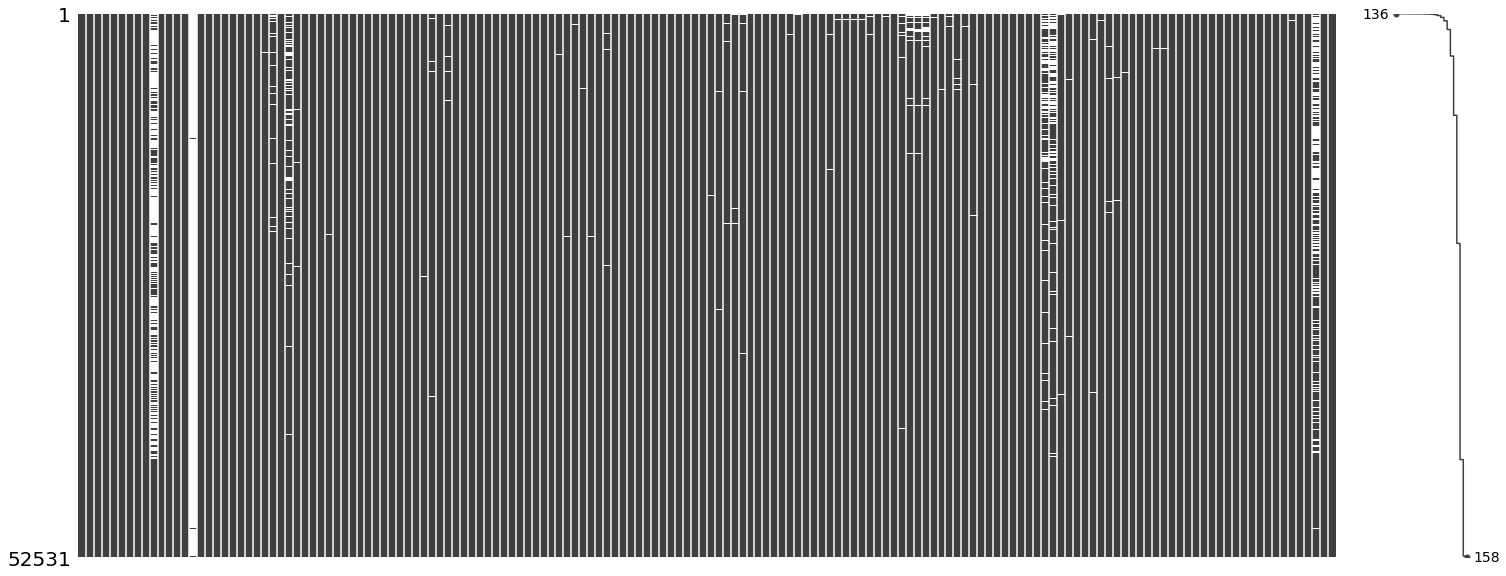

In [63]:
msno.matrix(df_a, sort='ascending')

In [64]:
df_a.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52531 entries, 0 to 64453
Columns: 158 entries, voted to early
dtypes: float64(109), int16(1), int64(2), int8(40), object(6)
memory usage: 49.4+ MB


In [65]:
df_a.select_dtypes('object').columns

Index(['lookupzip', 'countyfips', 'countyname', 'lookupzip_post',
       'countyfips_post', 'countyname_post'],
      dtype='object')

## Save

In [66]:
df_a.to_csv('a_data.csv')
dfn_a.to_csv('a_data_labeled.csv')

In [67]:
# store for use in other notebook
%store df_a
%store dfn_a

Stored 'df_a' (DataFrame)
Stored 'dfn_a' (DataFrame)
